# Exercise - Simple Linear Regression



In this notebook you can check your understanding of linear regression and implement a linear regression model with scikit-learn by yourself. 




## Learning Objectives



At the end of this notebook you should be able to 
- describe the relationship between two variables.
- train a linear regression model with scikit-learn.
- interpret the $R^2$ of a linear regression model.

## Question 1 



The scatter plots below show the relationship between height, diameter, and volume of timber in 31 felled black cherry trees. The diameter of the tree is measured 4.5 feet above the ground.  

<img src="images/lin_reg_ex_1.png" width="600">  

**(a) Describe the relationship between volume and height of these trees.**

Tendentially the higher the tree, the more volume it has. Not 100% of the case, but in that direction.

**(b) Describe the relationship between volume and diameter of these trees.**

The bigger the diameter, the higher the volume. Up til 9cm diameter, seems to be same volume.

**(c) Suppose you measured the height and diameter of another black cherry tree. Which of these variables would be better for predicting the wood volume of this tree using a simple linear regression model? Explain your reasoning.**

Since diameter has a strong correlation with volume, one could run linear regression on it since it has also less residual spread. Therefore it is better at predicting volume than height alone.

## Question 2 

The file `utils.csv` in your data folder contains information about the average utility bills for homes of a particular size and the average monthly temperature.  

**(a) Load the data:**

In [1]:
# Import required packages 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure stile and size for entire notebook
sns.set_style("ticks")
plt.rcParams["figure.figsize"] = (7,4)

In [3]:
# Import data with pandas 
utils = pd.read_csv("data/utils.csv")
utils.head()

,Month,Average Bill,Average Monthly Temperature
0,Jan,148.5,38
1,Feb,136.5,45
2,Mar,117.0,49
3,Apr,91.5,57
4,May,82.5,69


**(b) Make a scatter plot of the data average bill vs average monthly temperature. Which variable would make the most sense as the response variable?**

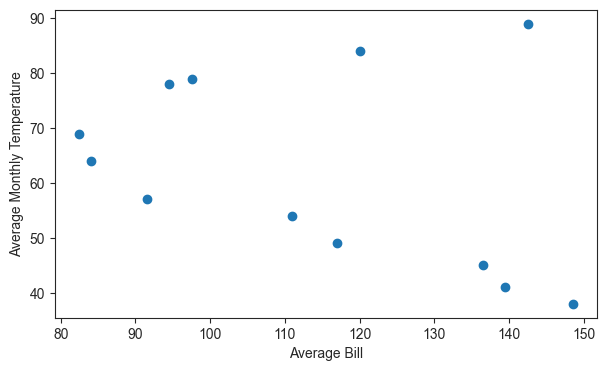

In [4]:
# Plot the variables of interest as scatter plot
plt.scatter(utils['Average Bill'], utils['Average Monthly Temperature'])
plt.xlabel("Average Bill")
plt.ylabel("Average Monthly Temperature");

# Perhaps temperature marks a better response variable

**(c) Have a look at the plot above. How would you describe the relationship between the variables?** 

The hotter or colder the temperature the higher the bill. Seems like between 58 to 80 degrees Farenheit mean less bill. These temperatures tend to be comfortable for many people.

**(d) Train a simple linear regression model using scikit-learn**

In [5]:
# Import linear regression from sklearn library
from sklearn.linear_model import LinearRegression

In [16]:
# Prepare data for modeling by defining target and feature
X = utils[['Average Monthly Temperature']]
y = utils['Average Bill']

In [17]:
# Show dimensions of X
X.shape

(12, 1)

In [18]:
# Instantiate our model 
lin_reg = LinearRegression()

# Train the model using our data
lin_reg.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [19]:
# Intercept and slope/coefficient can be accessed via .intercept_ and .coef_
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]
print("Model intercept:", intercept)
print("Coefficient for feature weight:", slope)

Model intercept: 143.62280506779285
Coefficient for feature weight: -0.4798844187597245


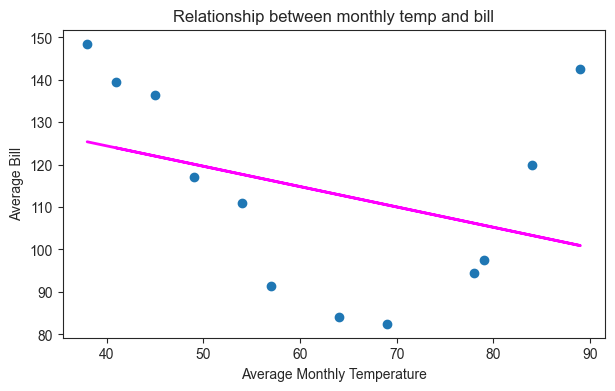

In [20]:
# Plotting our data points
plt.scatter(X, y)

# Adding the fitted regression line of our model
plt.plot(X, X*slope +intercept, '-', color='magenta', linewidth=2)

plt.title("Relationship between monthly temp and bill")
plt.ylabel("Average Bill");
plt.xlabel("Average Monthly Temperature");

**(e) Calculate and interpret the value of $R^2$.**  

In [21]:
# Import r-squared from sklearn
from sklearn.metrics import r2_score

# Calculate the estimated value for each data point
y_hat = lin_reg.predict(X)

# Calculate the R-squared for our model
print("R-squared:", round(r2_score(y, y_hat), 3))

R-squared: 0.124


**(f) Print the intercept and slope/coefficient and interpret them in terms a home owner would understand.**

In [26]:
# Intercept and slope/coefficient can be accessed via .intercept_ and .coef_
intercept = lin_reg.intercept_
slope = lin_reg.coef_[0]
print("Possible bill at a temperature of 0:", intercept)
print("Reduction of bill as temperature drops:", slope)

Possible bill at a temperature of 0: 143.62280506779285
Reduction of bill as temperature drops: -0.4798844187597245


**(g) Use your fitted model to estimate the average utility bill if the average monthly temperature is 120 degrees. Do you think that your answer is reasonable? Why or why not?** 

In [22]:
# Predict the utility bill at 120 degrees 
new_temp = pd.DataFrame({'Average Monthly Temperature': [120]})
y_hat_new = lin_reg.predict(new_temp)
print("Predicted bill for 120 degrees:", y_hat_new[0].round(3))

Predicted bill for 120 degrees: 86.037


It is not reasonable because the data is plotted as a U, so the linear regression can't estimate.